In [1]:
from Utilities import *

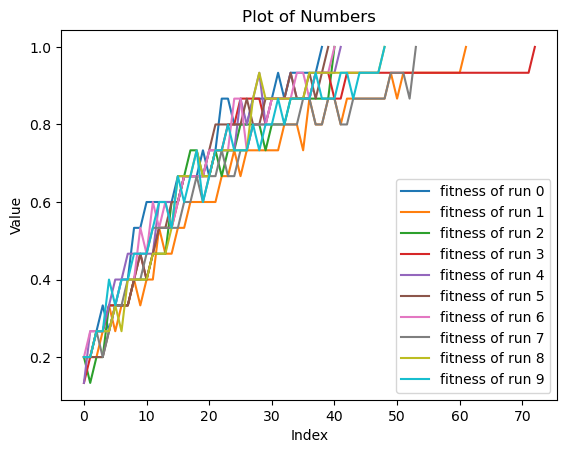

In [3]:
import matplotlib.pyplot as plt

# Plot the numbers
fitnesses = load_output("b1.1")
for i, values in enumerate(fitnesses):
    plt.plot(values, label=f"fitness of run {i}")

# Labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Plot of Numbers")
plt.legend()

# Show the plot
plt.show()

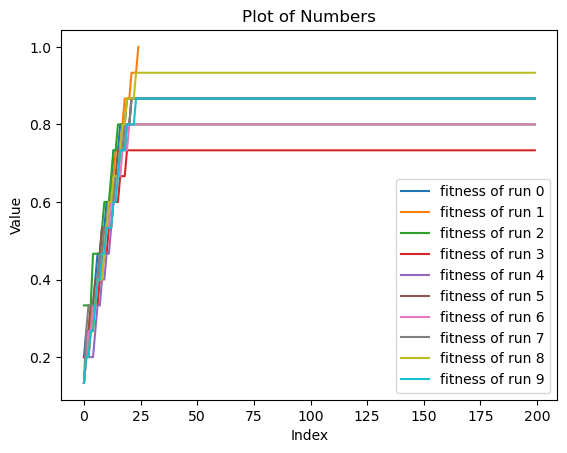

In [5]:
import matplotlib.pyplot as plt

# Plot the numbers
fitnesses = load_output("b1.2a")
for i, values in enumerate(fitnesses):
    plt.plot(values, label=f"fitness of run {i}")

# Labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Plot of Numbers")
plt.legend()

# Show the plot
plt.show()

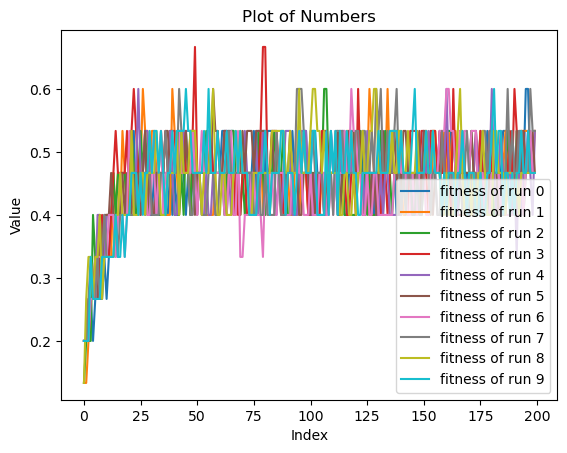

In [6]:
import matplotlib.pyplot as plt

# Plot the numbers
fitnesses = load_output("b1.2b")
for i, values in enumerate(fitnesses):
    plt.plot(values, label=f"fitness of run {i}")

# Labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Plot of Numbers")
plt.legend()

# Show the plot
plt.show()

In [3]:
dist1 =[len(x) for x in load_output("data/b1.1")]
dist2 =[len(x) for x in load_output("data/b1.2a")]
dist3 =[len(x) for x in load_output("data/b1.2b")]

C:\Users\marta\AppData\Local\Temp\ipykernel_4312\1576265705.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=data["mu"], y=data["#Generations"], size=5, palette="viridis")


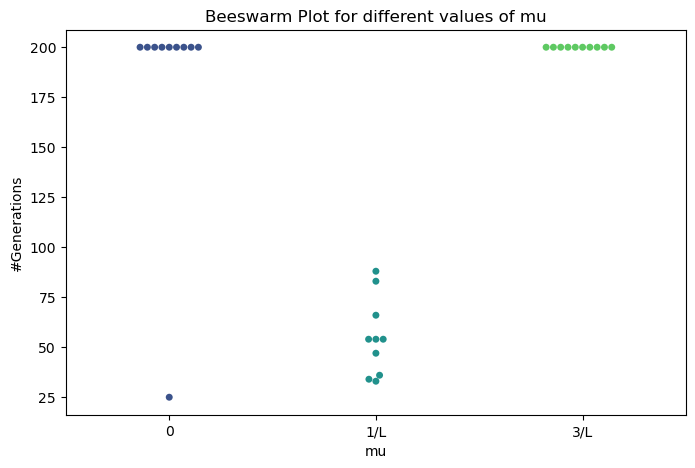

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate three distributions
np.random.seed(42)
# Combine into a single dataset
data = {
    "#Generations": np.concatenate([dist2, dist1, dist3]),
    "mu": ["0"] * 10 + ["1/L"] * 10 + ["3/L"] * 10  # Labels for each distribution
}

# Create the beeswarm plot
plt.figure(figsize=(8, 5))
sns.swarmplot(x=data["mu"], y=data["#Generations"], size=5, palette="viridis")

# Labels and title
plt.xlabel("mu")
plt.ylabel("#Generations")
plt.title("Beeswarm Plot for different values of mu")

# Show the plot
plt.show()

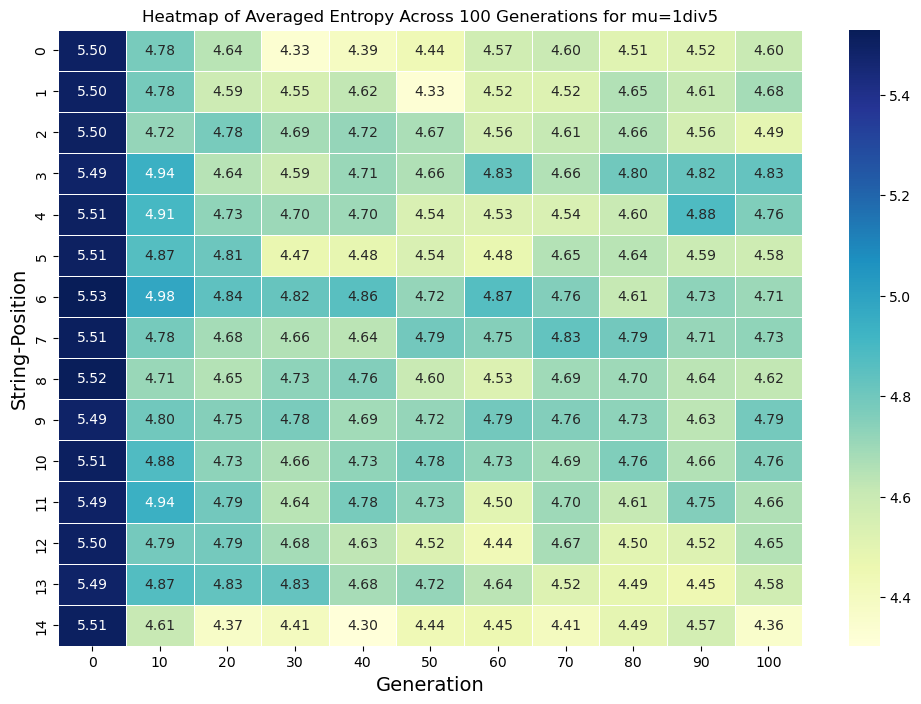

In [22]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Directory containing the CSV files
mu = "1div5"
csv_dir = f"data/csv/entropy/ex-logo-mu{mu}-K2-N200"

# Initialize an empty list to hold all data
all_data = []

# Iterate through each generation file for each experiment (0-gen0.csv, 1-gen0.csv, ..., 9-gen0.csv, ...)
for gen_num in range(0, 101, 10):  # Files are named 0-gen0.csv, 1-gen0.csv, ..., 9-gen0.csv, ..., 0-gen100.csv
    for exp_num in range(10):  # We have 10 experiments (0-9)
        file_path = os.path.join(csv_dir, f"{exp_num}-gen{gen_num}.csv")
        
        if os.path.exists(file_path):  # Check if the file exists
            # Load the data
            df = pd.read_csv(file_path)
            
            # Add a column for the generation (extracted from the filename)
            df['Generation'] = gen_num
            df['Experiment'] = exp_num  # Add the experiment number for identification
            
            # Append the data to the all_data list
            all_data.append(df)
        else:
            print(f"File {file_path} not found!")

# Combine all data into a single DataFrame
if all_data:
    data = pd.concat(all_data, ignore_index=True)
    
    # Group by 'Value' and 'Generation' and compute the mean of 'Count' over the experiments
    averaged_data = data.groupby(['Value', 'Generation'])['Count'].mean().reset_index()
    
    # Pivot the data to get 'Value' on the rows, 'Generation' on the columns, and the averaged 'Count' as values
    heatmap_data = averaged_data.pivot_table(index='Value', columns='Generation', values='Count', aggfunc='mean')
    
    # Replace zeros with NaN so they do not show up on the heatmap
    heatmap_data = heatmap_data.replace(0, float('nan'))
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
    plt.title(f'Heatmap of Averaged Entropy Across 100 Generations for mu={mu}')
    plt.xlabel('Generation', fontsize=14)
    plt.ylabel('String-Position', fontsize=14)
    plt.show()
else:
    print("No data available to plot.")


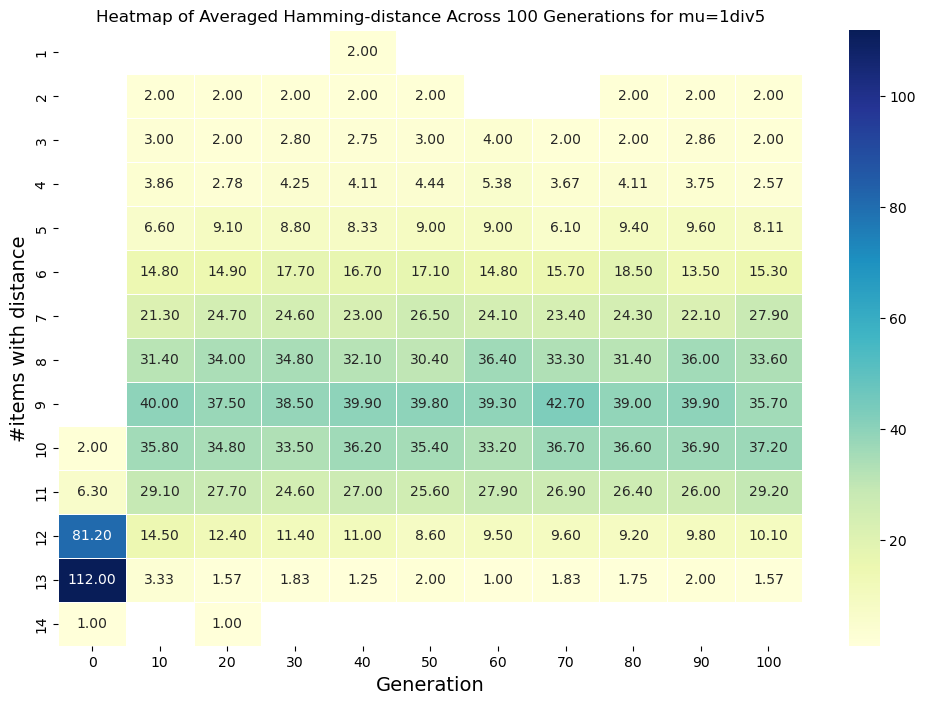

In [26]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Directory containing the CSV files
mu = "1div5"
csv_dir = f"data/csv/hamming/ex-logo-mu{mu}-K2-N200"

# Initialize an empty list to hold all data
all_data = []

# Iterate through each generation file for each experiment (0-gen0.csv, 1-gen0.csv, ..., 9-gen0.csv, ...)
for gen_num in range(0, 101, 10):  # Files are named 0-gen0.csv, 1-gen0.csv, ..., 9-gen0.csv, ..., 0-gen100.csv
    for exp_num in range(10):  # We have 10 experiments (0-9)
        file_path = os.path.join(csv_dir, f"{exp_num}-gen{gen_num}.csv")
        
        if os.path.exists(file_path):  # Check if the file exists
            # Load the data
            df = pd.read_csv(file_path)
            
            # Add a column for the generation (extracted from the filename)
            df['Generation'] = gen_num
            df['Experiment'] = exp_num  # Add the experiment number for identification
            
            # Append the data to the all_data list
            all_data.append(df)
        else:
            print(f"File {file_path} not found!")

# Combine all data into a single DataFrame
if all_data:
    data = pd.concat(all_data, ignore_index=True)
    
    # Group by 'Value' and 'Generation' and compute the mean of 'Count' over the experiments
    averaged_data = data.groupby(['Value', 'Generation'])['Count'].mean().reset_index()
    
    # Pivot the data to get 'Value' on the rows, 'Generation' on the columns, and the averaged 'Count' as values
    heatmap_data = averaged_data.pivot_table(index='Value', columns='Generation', values='Count', aggfunc='mean')
    
    # Replace zeros with NaN so they do not show up on the heatmap
    heatmap_data = heatmap_data.replace(0, float('nan'))
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
    plt.title(f'Heatmap of Averaged Hamming-distance Across 100 Generations for mu={mu}')
    plt.xlabel('Generation', fontsize=14)
    plt.ylabel('#items with distance', fontsize=14)
    plt.show()
else:
    print("No data available to plot.")


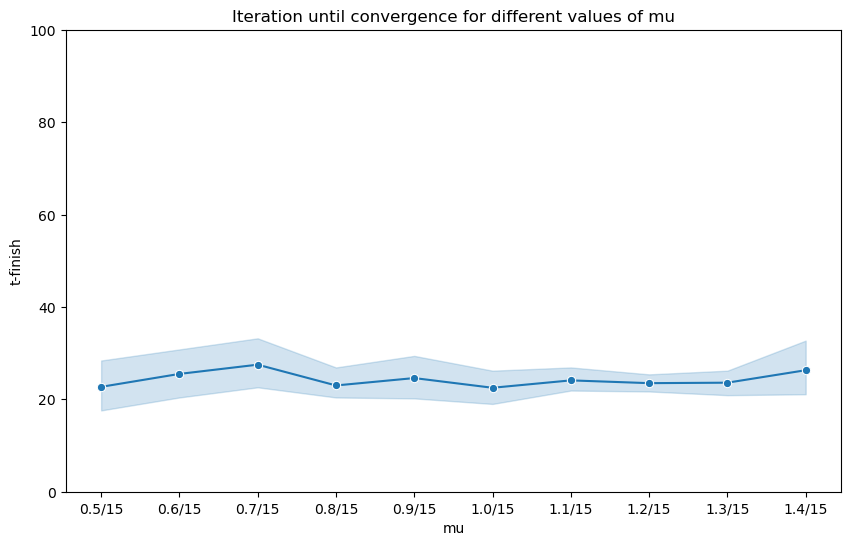

In [44]:
import matplotlib.pyplot as plt

generations = load_output("data/t-finish-k5-varyingmus")

import matplotlib.pyplot as plt
import seaborn as sns
# Create the x-axis values (e.g., generations or time steps)

x = [f"{x:.1f}/15" for x in np.arange(0.5, 1.5, 0.1)] # Assuming you want 10 generations/steps
# Convert the generations data into a format that seaborn can use (long format)
import pandas as pd

# Flatten the generations into a DataFrame
data = {
    'mu': np.repeat(x, len(generations)),
    't-finish': np.concatenate(generations)
}

df = pd.DataFrame(data)

# Create the plot using seaborn's lineplot
plt.figure(figsize=(10, 6))

sns.lineplot(x='mu', y='t-finish', data=df,marker="o")  # ci='sd' indicates we want to plot the standard deviation as uncertainty

# Customize the plot
plt.ylim(0, 100)
plt.title('Iteration until convergence for different values of mu')
plt.xlabel('mu')
plt.ylabel('t-finish')

# Show the plot
plt.show()